# Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Importing Data Set

In [9]:
Corolla = pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin1')
Corolla.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [10]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [11]:
Corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [14]:
Corolla = Corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [15]:
Corolla.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [16]:
Corolla.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

#Renaming the Columns Name and making it short

In [17]:
Corolla = Corolla.rename({"Age_08_04":"Age" , "Quarterly_Tax" : "QT"}, axis = 1)
Corolla.head()

Price  Age     KM  HP    cc  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [18]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


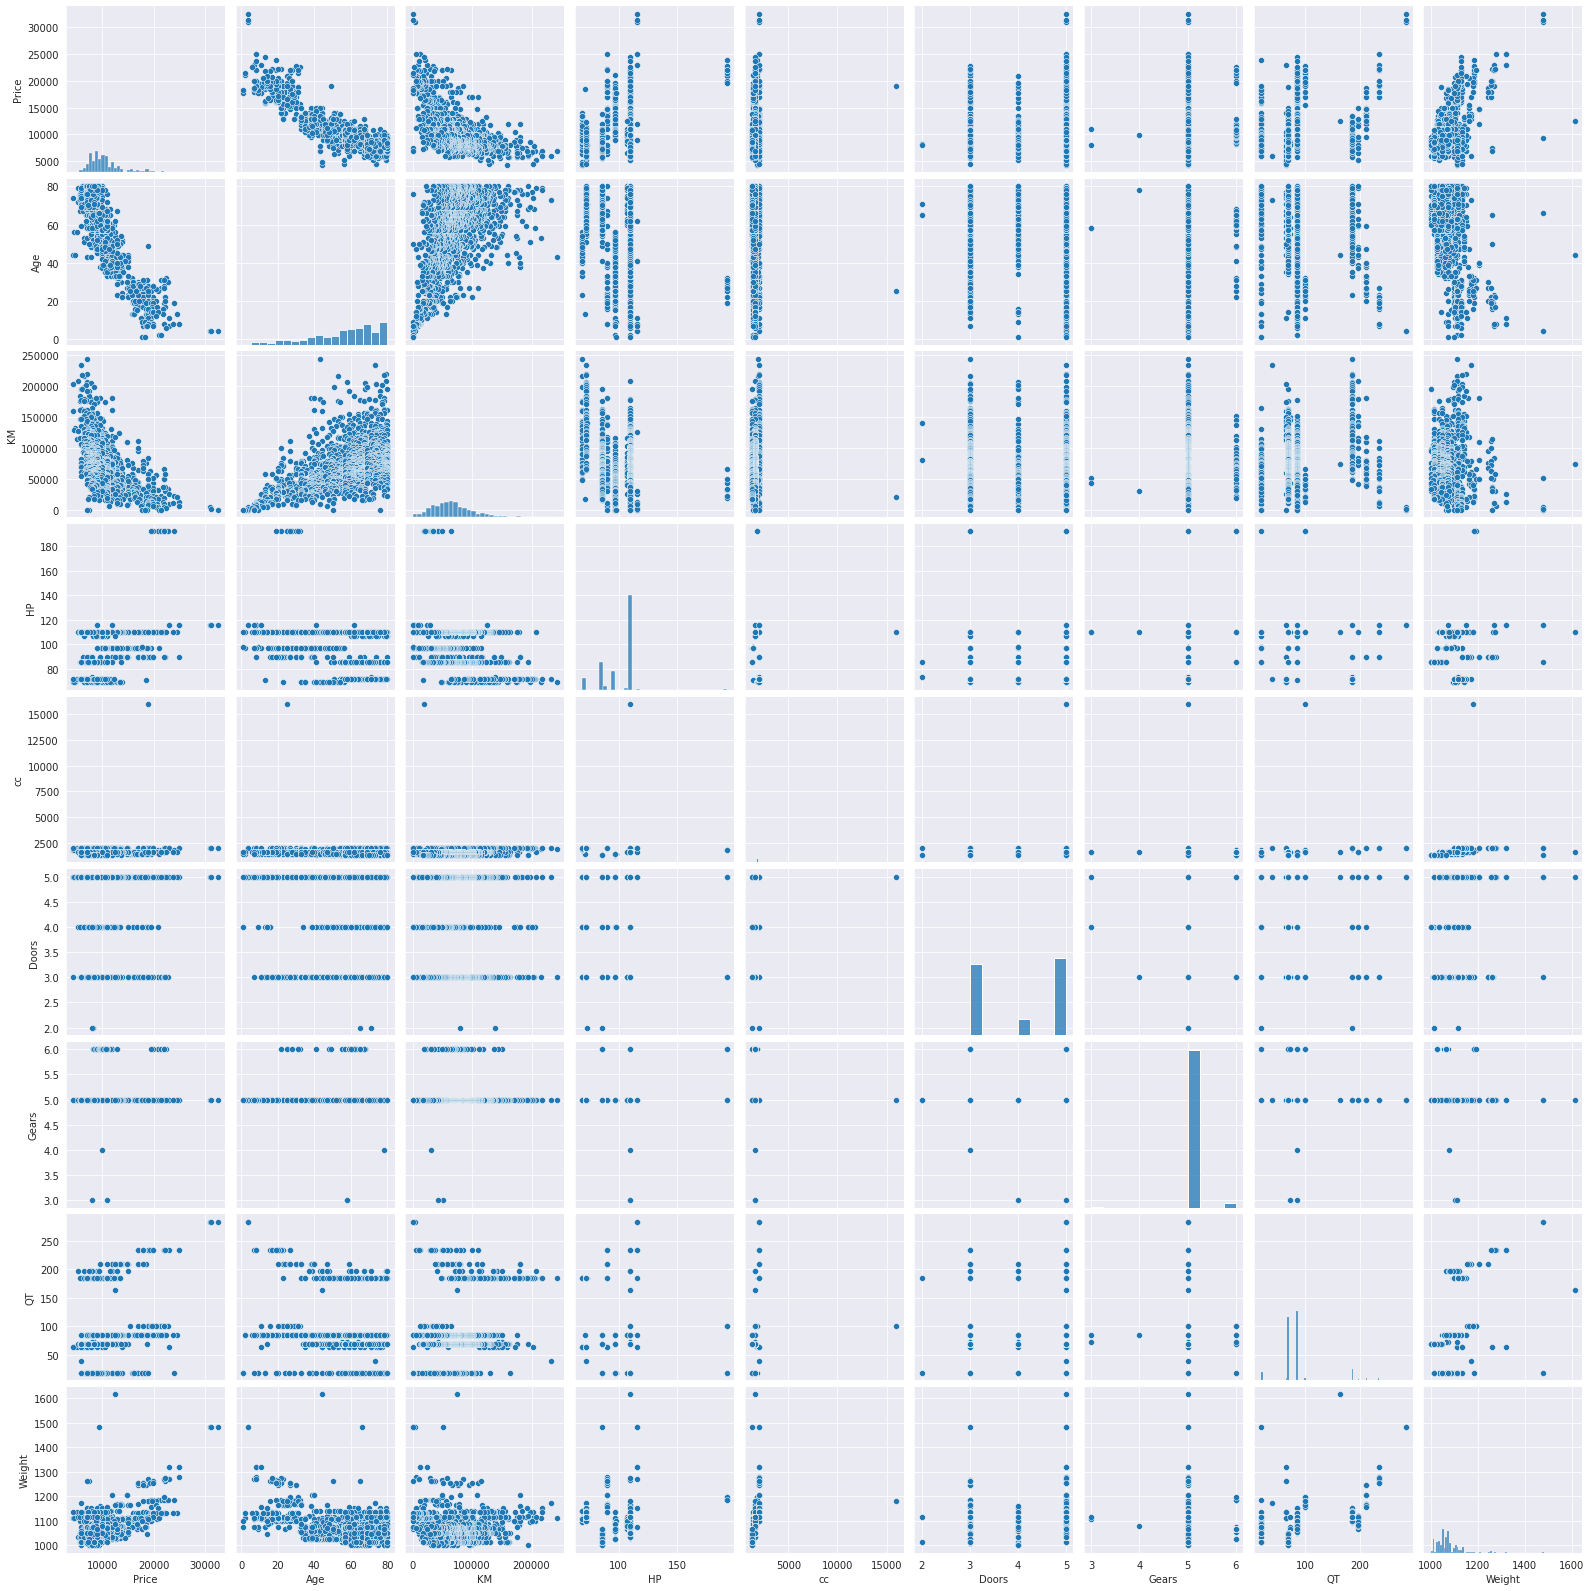

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(Corolla)

#Model Building

In [20]:
model=smf.ols("Price~Age+KM+Weight",data=Corolla).fit()

#Model Testing

In [21]:
model.params

Intercept   -1880.335564
Age          -120.221174
KM             -0.024183
Weight         19.576043
dtype: float64

In [22]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -1.953153
 Age         -43.841468
 KM          -20.141779
 Weight       23.409444
 dtype: float64, Intercept    0.051
 Age          0.000
 KM           0.000
 Weight       0.000
 dtype: float64)

In [23]:
model.rsquared , model.rsquared_adj

(0.848104243893788, 0.8477860265276438)

In [24]:
mlr_am=smf.ols("Price~Age+KM+Weight",data=Corolla).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    -1.953153
 Age         -43.841468
 KM          -20.141779
 Weight       23.409444
 dtype: float64, Intercept     5.099603e-02
 Age          6.162098e-267
 KM            1.221576e-79
 Weight       6.992783e-103
 dtype: float64)

#Graphs

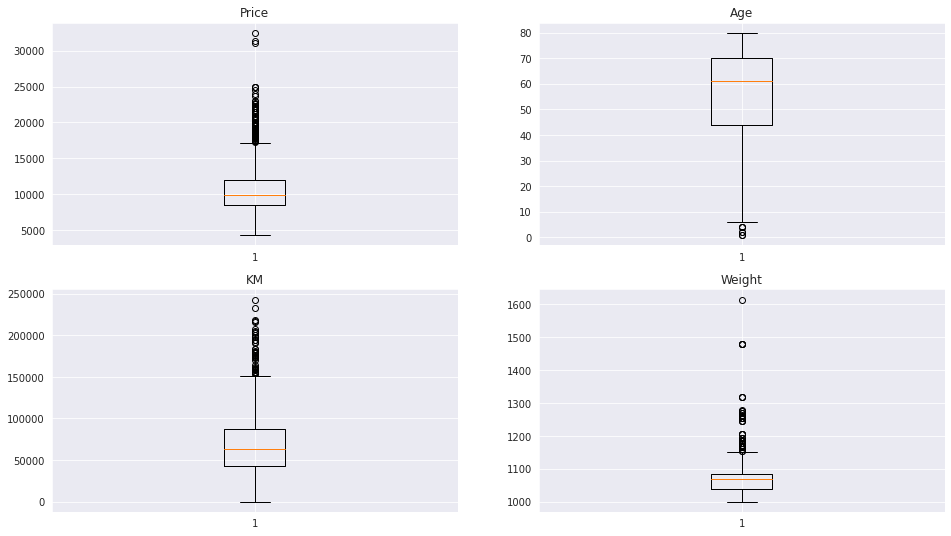

In [25]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(Corolla['Price'])
plt.title('Price')
plt.subplot(222)
plt.boxplot(Corolla['Age'])
plt.title('Age')
plt.subplot(223)
plt.boxplot(Corolla['KM'])
plt.title('KM')
plt.subplot(224)
plt.boxplot(Corolla['Weight'])
plt.title('Weight')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

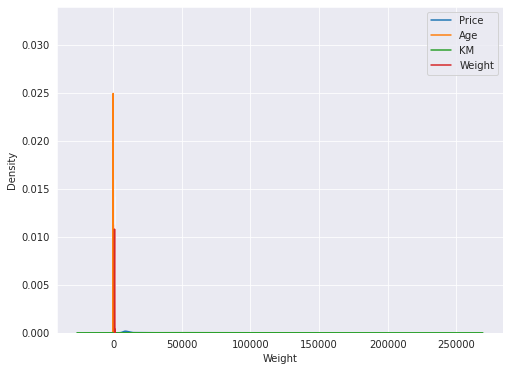

In [28]:
plt.figure(figsize = (8,6))
labels = ['Price', 'Age', 'KM', 'Weight']
sns.distplot(Corolla['Price'],hist = True)
sns.distplot(Corolla['Age'],hist = True)
sns.distplot(Corolla['KM'],hist = True)
sns.distplot(Corolla['Weight'],hist = True)
plt.legend(labels)

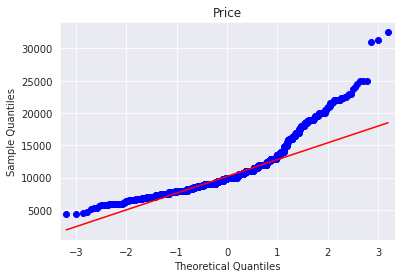

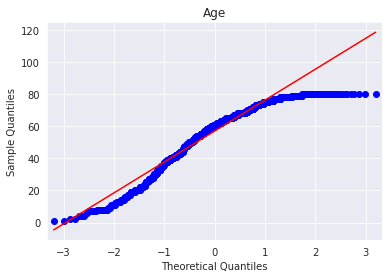

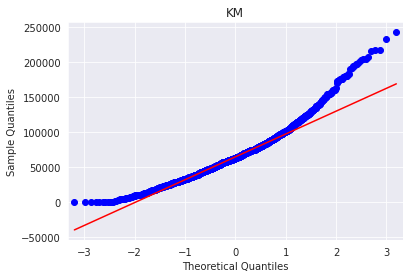

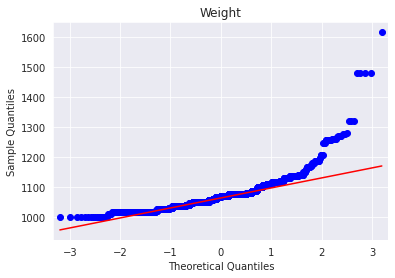

In [29]:
sm.qqplot(Corolla["Price"], line = 'q')
plt.title('Price')
sm.qqplot(Corolla["Age"], line = 'q')
plt.title('Age')
sm.qqplot(Corolla["KM"], line = 'q')
plt.title('KM')
sm.qqplot(Corolla["Weight"], line = 'q')
plt.title('Weight')
plt.show()

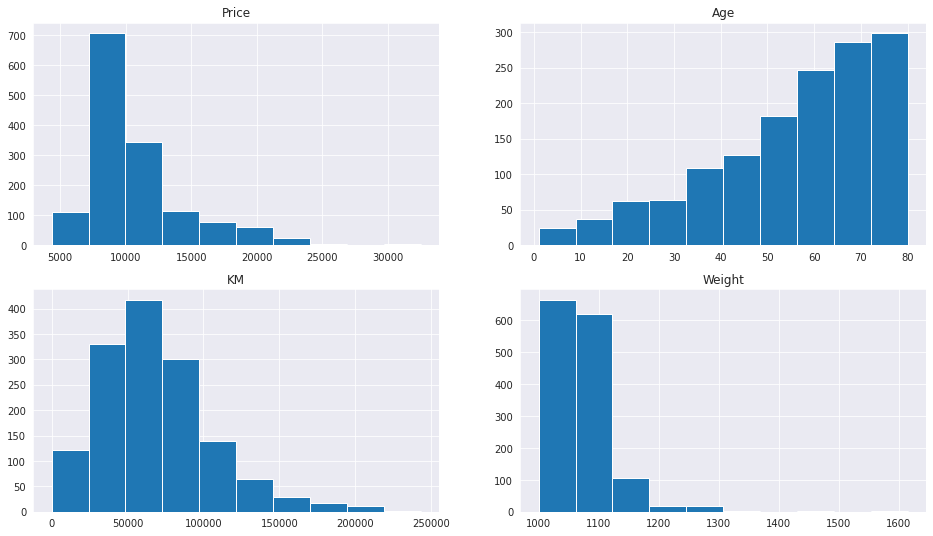

In [30]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.hist(Corolla['Price'])
plt.title('Price')
plt.subplot(222)
plt.hist(Corolla['Age'])
plt.title('Age')
plt.subplot(223)
plt.hist(Corolla['KM'])
plt.title('KM')
plt.subplot(224)
plt.hist(Corolla['Weight'])
plt.title('Weight')
plt.show()

# INDEPENDENT AND DEPENDENT VARIABLE

In [32]:
Corolla.head(2)

Price  Age     KM  HP    cc  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165

In [33]:
X = Corolla.iloc[: , 1:].values
y = Corolla.iloc[:, 0].values

In [34]:
X

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]])

In [35]:
y

array([13500, 13750, 13950, ...,  8500,  7250,  6950])

# Encoding Categorical Data

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3] )], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 2.100e+02,
        1.165e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 2.100e+02,
        1.165e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 2.100e+02,
        1.165e+03],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 6.900e+01,
        1.015e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 6.900e+01,
        1.015e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 1.900e+01,
        1.114e+03]])

In [38]:
X = X[:, 1:]

In [39]:
X

array([[   0.,    0.,    0., ...,    5.,  210., 1165.],
       [   0.,    0.,    0., ...,    5.,  210., 1165.],
       [   0.,    0.,    0., ...,    5.,  210., 1165.],
       ...,
       [   0.,    0.,    0., ...,    5.,   69., 1015.],
       [   0.,    0.,    0., ...,    5.,   69., 1015.],
       [   0.,    0.,    0., ...,    5.,   19., 1114.]])

# Splitting the Dataset

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

# Fitting the MLR mode

In [41]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = regression.predict(X_test)
y_pred

array([ 8167.17554158, 10517.76427163, 13061.07032505,  7525.34787714,
       10520.12401331,  9467.35416385,  5980.02560406, 15631.3140919 ,
       11210.79333328, 10656.27214785,  6842.04353274, 11359.38762721,
       11817.21302078,  9718.65370549,  7363.47012147, 15527.18118607,
       11148.72355312,  7509.55784797, 13054.62351976,  8634.1794741 ,
        7085.19620863,  6330.56812505, 11630.90145065, 12635.29547332,
       19134.48530541,  7594.35344483, 14138.02873473,  5693.47198885,
        9112.26270149,  7849.98494428, 10594.19967606,  7926.33402726,
       16780.1304787 ,  7151.59867182, 10456.45752181, 12807.90122521,
        9647.35872931, 12402.22050129,  9417.85292371,  9404.20882121,
        9361.94589854, 10584.30939682,  9710.80607818, 16849.00400035,
       10501.34123904,  7379.59767045,  9698.34964509,  7406.89695127,
        8754.62565914,  8612.84022599, 18936.92140321,  8375.84524953,
        7154.9483052 ,  6885.91541232, 11360.24626732, 18257.52668777,
      

In [43]:
y_test

array([ 7950, 10950, 14950,  7500,  9900,  8900,  6950, 15750, 11950,
        9930,  8500, 10450, 11895,  9950,  6450, 15500, 11950,  6900,
       10950,  9750,  7350,  8950, 13750, 14950, 19950,  9450, 11500,
        8500,  9450,  8800, 11450, 10500, 13750,  8250, 10950, 11950,
        8950, 12900,  9500,  9950,  8950,  9500,  9950, 15500, 10950,
        7500,  9450,  9500, 10845,  8500, 19750,  8950,  7250,  6750,
       10950, 19950, 11000,  8950, 17795, 10500,  5740,  7750, 10950,
       10500, 12500, 12900,  8450,  7950, 19450, 11450,  9500,  4450,
       11690,  7900, 14750, 14990,  9950,  7450,  6950,  8250,  6750,
        6900,  5950, 12750, 11950, 10750,  8950, 11950,  8250,  7450,
        6950, 10750, 17450,  9940,  7950, 12250, 12950, 10950, 12450,
        6900,  8500, 10750,  9700,  9250,  7900, 19000, 18450,  8500,
       13250, 10400, 12500,  9200,  8500,  8250, 13750,  8950,  7950,
       10950,  9900,  7750, 20500,  9950, 13995, 10250,  7950, 23950,
        7950, 11500,

# MLR OPTIMAL MODEL

In [44]:
import statsmodels.api as sm
X = np.append(arr = np.ones((50,1)).astype(int),values=X,axis=1)
X

ValueError: ignored

In [45]:
X_opt = X[:, [0,1,2,3,4,5]]

In [46]:
X_opt = np.array(X_opt, dtype=float)

In [47]:
import statsmodels.api as sm
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              510.2
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:49:30   Log-Likelihood:                         -14621.
No. Observations:                1436   AIC:                                  2.925e+04
Df Residuals:                    1430   BIC:                                  2.929e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8375.0000   4528.999      1.849      0.065    -509.195    1.73e+04
x2          1.022e+04   4528.999      2.258      0.024    1340.805    1.91e+04
x3          1.285e+04    500.144     25.688      0.000    1.19e+04    1.38e+04
x4          9475.0000   3202.486      2.959      0.003    3192.926    1.58e+04
x5          1.478e+04   3202.486      4.614      0.000    8495.426    2.11e+04
x6          1.071e+04    220.338     48.605      0.000    1.03e+04    1.11e+04
==============================================================================
Omnibus:                      284.639   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.773
Skew:                           1.187   Prob(JB):                    1.02e-117
Kurtosis:                       4.836   Cond. No.                         20.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X_opt = X[:, [1,2,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              610.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:51:09   Log-Likelihood:                         -14623.
No. Observations:                1436   AIC:                                  2.926e+04
Df Residuals:                    1431   BIC:                                  2.928e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.022e+04   4532.826      2.256      0.024    1333.303    1.91e+04
x2          1.285e+04    500.567     25.666      0.000    1.19e+04    1.38e+04
x3          9475.0000   3205.192      2.956      0.003    3187.621    1.58e+04
x4          1.478e+04   3205.192      4.610      0.000    8490.121    2.11e+04
x5          1.071e+04    220.524     48.564      0.000    1.03e+04    1.11e+04
==============================================================================
Omnibus:                      282.271   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.337
Skew:                           1.181   Prob(JB):                    4.18e-116
Kurtosis:                       4.818   Cond. No.                         20.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X_opt = X[:, [2,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              759.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:54:02   Log-Likelihood:                         -14625.
No. Observations:                1436   AIC:                                  2.926e+04
Df Residuals:                    1432   BIC:                                  2.928e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.285e+04    501.281     25.629      0.000    1.19e+04    1.38e+04
x2          9475.0000   3209.764      2.952      0.003    3178.656    1.58e+04
x3          1.478e+04   3209.764      4.604      0.000    8481.156    2.11e+04
x4          1.071e+04    220.839     48.495      0.000    1.03e+04    1.11e+04
==============================================================================
Omnibus:                      279.284   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.532
Skew:                           1.173   Prob(JB):                    5.63e-114
Kurtosis:                       4.792   Cond. No.                         14.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_opt = X[:, [2,4,5]]
X_opt = np.array(X_opt, dtype=float)
regression_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              1005.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:54:27   Log-Likelihood:                         -14630.
No. Observations:                1436   AIC:                                  2.927e+04
Df Residuals:                    1433   BIC:                                  2.928e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.285e+04    502.628     25.561      0.000    1.19e+04    1.38e+04
x2          1.478e+04   3218.392      4.592      0.000    8464.235    2.11e+04
x3          1.071e+04    221.432     48.365      0.000    1.03e+04    1.11e+04
==============================================================================
Omnibus:                      273.846   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.359
Skew:                           1.159   Prob(JB):                    3.02e-110
Kurtosis:                       4.748   Cond. No.                         14.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""